In [1]:
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def L2(y_train, y_new):
    return ((y_train-y_new)**2).sum()

In [3]:
def mDataCreate(f, boundary, dataNum, norInp=(0, 0.05)):
        mean, sigma = norInp
        x_min, x_max = boundary
        X = np.arange(x_min, x_max, (x_max-x_min)/dataNum)
        Y = f(X)
        noise = np.random.normal(mean, sigma, dataNum)

        X = X[:,np.newaxis]
        Y = Y[:,np.newaxis] + noise[:,np.newaxis]
        
        return (X, Y)


class mRegression:
    
    def __init__(self, mDegree=1):
        self.mDegree = mDegree
        
    def mObtainData(self, data):
        self.X, self.Y = data
    
    def mDataSplit(self, test_size=0.2, random_state=0):
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(self.X, self.Y, 
                                                                                test_size=test_size, 
                                                                                random_state=random_state)
    
    def mCreateModel(self):
        
        self.poly_reg = PolynomialFeatures(degree = self.mDegree)
        self.X_poly = self.poly_reg.fit_transform(self.X_train)
        self.model = LinearRegression()
        self.model.fit(self.X_poly, self.Y_train)
        
    def mCalcLoss(self):
        Y_new = self.model.predict(self.X_poly)
        self.resL2 = self.L2(self.Y_train,Y_new)
        
    def mCont(self):
        xden = self.poly_reg.fit_transform(self.X_test)
        return self.L2(self.model.predict(xden), self.Y_test)
        
    def mPredict(self, new_boundary, n=100):
        x_new_min, x_new_max = new_boundary
        self.X_new = np.linspace(x_new_min, x_new_max, n)[:,np.newaxis]
        X_new_poly = self.poly_reg.fit_transform(self.X_new)
        self.Y_new = self.model.predict(X_new_poly)
        
    def mPlot(self, plt_lim=((-0.1,2*np.pi+0.1),(-2,2))):
        
        plt.plot(self.X_new, self.Y_new, color='black', linewidth=3)
        plt.scatter(self.X_train,self.Y_train, label='Train Data')
        plt.scatter(self.X_test, self.Y_test, label='Test Data')
        

        plt.grid()
        title = 'Degree = {}; L2 = {}; Train L2 = {}'.format(self.mDegree, self.resL2, self.mCont())

        plt.title("Polynomial \n " + title,
                  fontsize=10)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.xlim(plt_lim[0])
        plt.ylim(plt_lim[1])
        plt.legend()
        plt.show()
        
    def L2(self, y_train, y_new):
        return np.sqrt(((y_train-y_new)**2).sum())
    
    def makeRegression(self, new_boundary, norInp=(0, 0.05), test_size=0.2, random_state=0, n=100):
        self.mDataSplit(test_size=test_size, random_state=random_state)
        self.mCreateModel()
        self.mCalcLoss()
        self.mPredict(new_boundary, n)
        
    

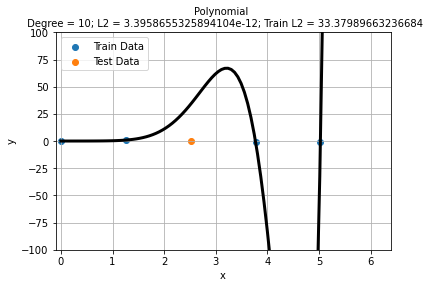

In [4]:
bc = (0, 2*np.pi)
dataNum = 5
data = mDataCreate(np.sin, bc, dataNum)


mreg = mRegression(10)

mreg.mObtainData(data)
mreg.makeRegression(bc)
mreg.mPlot(((-0.1,2*np.pi+0.1),(-100,100)))

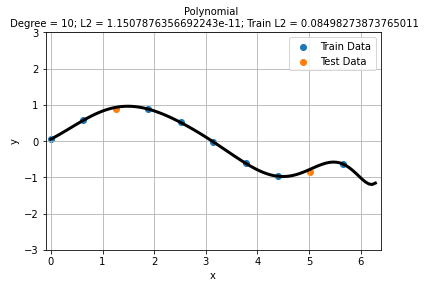

In [5]:
bc = (0, 2*np.pi)
dataNum = 10
data = mDataCreate(np.sin, bc, dataNum)


mreg = mRegression(10)

mreg.mObtainData(data)
mreg.makeRegression(bc)
mreg.mPlot(((-0.1,2*np.pi+0.1),(-3,3)))

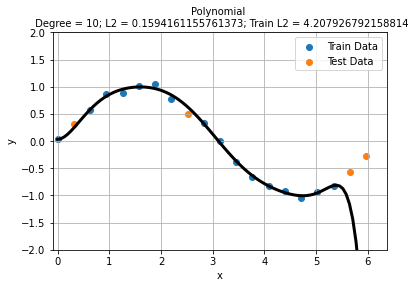

In [6]:
bc = (0, 2*np.pi)
dataNum = 20
data = mDataCreate(np.sin, bc, dataNum)


mreg = mRegression(10)

mreg.mObtainData(data)
mreg.makeRegression(bc)
mreg.mPlot()

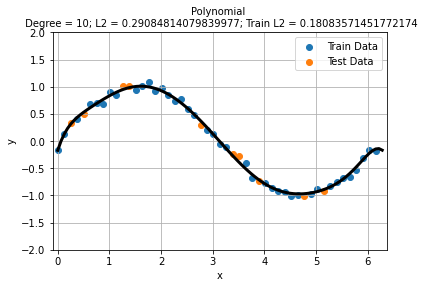

In [7]:
bc = (0, 2*np.pi)
dataNum = 50
data = mDataCreate(np.sin, bc, dataNum)


mreg = mRegression(10)

mreg.mObtainData(data)
mreg.makeRegression(bc)
mreg.mPlot()

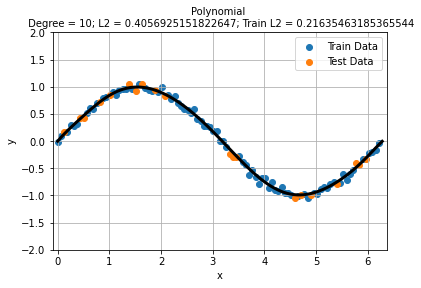

In [8]:
bc = (0, 2*np.pi)
dataNum = 100
data = mDataCreate(np.sin, bc, dataNum)


mreg = mRegression(10)

mreg.mObtainData(data)
mreg.makeRegression(bc)
mreg.mPlot()

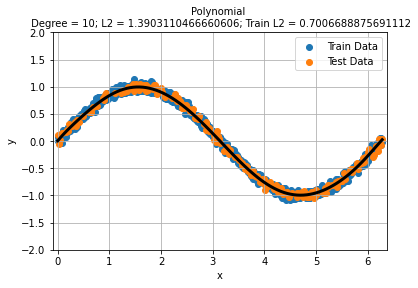

In [9]:
bc = (0, 2*np.pi)
dataNum = 1000
data = mDataCreate(np.sin, bc, dataNum)


mreg = mRegression(10)

mreg.mObtainData(data)
mreg.makeRegression(bc)
mreg.mPlot()